In [1]:
import os
import csv
import datetime as dt
from datetime import datetime as dtt
import pandas as pd
import matplotlib as plt
import numpy as np

## Part 1: Get NSI Data

The NSI data for the year 2018 onwards is available at:

https://www.misoenergy.org/markets-and-operations/real-time--market-data/market-reports/#nt=%2FMarketReportType%3ASummary%2FMarketReportName%3AHistorical%20NSI%20%20(csv)&t=10&p=0&s=MarketReportPublished&sd=desc

In [2]:
nsidata = pd.read_csv("https://docs.misoenergy.org/marketreports/2018_sr_hist_is.csv", error_bad_lines=False)

b'Skipping line 4294: expected 1 fields, saw 10\n'


In [3]:
# Examine the first 5 rows
nsidata.head()

,Historical Real-Time Net Scheduled Interface (MWhs) from: 01/01/2018 to: 12/31/2018||||||||||||||||||||||||||
0,INTERFACE|MKTDAY|HE1|HE2|HE3|HE4|HE5|HE6|HE7|H...
1,CSWS|01/01/2018|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
2,EDE|01/01/2018|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0...
3,EEI|01/01/2018|533|533|533|533|533|533|533|533...
4,IESO|01/01/2018|1008|887|911|911|480|476|976|1...


In [4]:
# Examine the last 5 rows
nsidata.tail()

,Historical Real-Time Net Scheduled Interface (MWhs) from: 01/01/2018 to: 12/31/2018||||||||||||||||||||||||||
4287,SWPP|12/31/2018|762|724|677|654|631|612|480|59...
4288,TVA|12/31/2018|92|90|93|91|93|90|48|106|119|10...
4289,WAUE|12/31/2018|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
4290,OTHER|12/31/2018|1029|1012|960|868|873|897|625...
4291,5043 - Historical Forecasted NSI v3.0 ...


In [5]:
# Remove the last row, since it is not a data row
nsidata = nsidata[:-1] # remove last row

In [6]:
# Split the first column on the pipe delimiter and save it 
nsidata=nsidata.iloc[:,0].str.split('|',expand=True)

In [7]:
nsidata.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,INTERFACE,MKTDAY,HE1,HE2,HE3,HE4,HE5,HE6,HE7,HE8,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
1,CSWS,01/01/2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,EDE,01/01/2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,EEI,01/01/2018,533,533,533,533,533,533,533,533,...,433,433,433,433,433,433,433,433,433,433
4,IESO,01/01/2018,1008,887,911,911,480,476,976,1072,...,938,1025,940,932,893,1005,890,827,802,917


In [8]:
# Promote the first row to header: Copy first row to header and then drop the duplicate row
nsidata.columns = nsidata.iloc[0]
nsidata=nsidata.reindex(nsidata.index.drop(0))

In [9]:
nsidata.head()

,INTERFACE,MKTDAY,HE1,HE2,HE3,HE4,HE5,HE6,HE7,HE8,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
1,CSWS,01/01/2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,EDE,01/01/2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,EEI,01/01/2018,533,533,533,533,533,533,533,533,...,433,433,433,433,433,433,433,433,433,433
4,IESO,01/01/2018,1008,887,911,911,480,476,976,1072,...,938,1025,940,932,893,1005,890,827,802,917
5,MHEB,01/01/2018,-220,26,27,27,26,26,-9,182,...,534,427,382,588,470,501,478,655,285,31


In [10]:
# Flatten the dataframe and save it in a new dataframe
nsidata_new = pd.melt(nsidata, id_vars=['INTERFACE', 'MKTDAY'], var_name='HE', value_name='NSI')

In [11]:
nsidata_new.head()

,INTERFACE,MKTDAY,HE,NSI
0,CSWS,01/01/2018,HE1,0
1,EDE,01/01/2018,HE1,0
2,EEI,01/01/2018,HE1,533
3,IESO,01/01/2018,HE1,1008
4,MHEB,01/01/2018,HE1,-220


In [12]:
# Remove the letters 'HE' from the Hour Ending column, so as to leave the numbers only
nsidata_new['HE'] = nsidata_new['HE'].str[2:]

In [13]:
nsidata_new.tail()

,INTERFACE,MKTDAY,HE,NSI
102955,SOCO,12/31/2018,24,0
102956,SWPP,12/31/2018,24,644
102957,TVA,12/31/2018,24,90
102958,WAUE,12/31/2018,24,0
102959,OTHER,12/31/2018,24,587


In [14]:
# Check the Data Types
print(nsidata_new.dtypes)

INTERFACE    object
MKTDAY       object
HE           object
NSI          object
dtype: object


In [15]:
# Change the Data Types of the columns
nsidata_new['HE'] = pd.to_numeric(nsidata_new['HE'])
nsidata_new['MKTDAY'] = pd.to_datetime(nsidata_new['MKTDAY'])
nsidata_new['NSI'] = pd.to_numeric(nsidata_new['NSI'])
nsidata_new['INTERFACE'] = nsidata_new['INTERFACE'].astype(str)
print(nsidata_new.dtypes)

INTERFACE            object
MKTDAY       datetime64[ns]
HE                    int64
NSI                 float64
dtype: object


In [16]:
nsidata_new.head()

,INTERFACE,MKTDAY,HE,NSI
0,CSWS,2018-01-01,1,0.0
1,EDE,2018-01-01,1,0.0
2,EEI,2018-01-01,1,533.0
3,IESO,2018-01-01,1,1008.0
4,MHEB,2018-01-01,1,-220.0


In [17]:
# Part 2: Analyze the data

In [18]:
nsidata_new.describe(include='all')

,INTERFACE,MKTDAY,HE,NSI
count,102960,102960,102960.00000,102940.000000
unique,12,365,NaN,NaN
top,TVA,2018-10-11 00:00:00,NaN,NaN
freq,8760,288,NaN,NaN
first,NaN,2018-01-01 00:00:00,NaN,NaN
last,NaN,2018-12-31 00:00:00,NaN,NaN
mean,NaN,NaN,12.50000,420.261988
std,NaN,NaN,6.92222,681.429610
min,NaN,NaN,1.00000,-4649.000000
25%,NaN,NaN,6.75000,0.000000


In [19]:
# Calculate total NSI for each interface
table = pd.pivot_table(nsidata_new, values='NSI', index=['INTERFACE'], aggfunc=np.sum)

In [20]:
# Calculate total GWh of NSI for each interface
table_sum = table.round(2)/1000
table_sum

,NSI
INTERFACE,
CSWS,0.000
EDE,0.000
EEI,4453.751
IESO,8638.177
MHEB,5492.249
OKGE,0.000
OTHER,4172.563
PJM,9559.566
SOCO,621.739


In [21]:
# Sort the total NSI in descending order
table_sum.sort_values(by=['NSI'], ascending = False)

,NSI
INTERFACE,
PJM,9559.566
IESO,8638.177
MHEB,5492.249
TVA,5427.918
SWPP,4895.806
EEI,4453.751
OTHER,4172.563
SOCO,621.739
CSWS,0.000


Based on the table, PJM and IESO are the top 2 contributors to MISO's net imports


In [22]:
table_all = pd.pivot_table(nsidata_new, values='NSI', index=['INTERFACE'], aggfunc=('max','mean','min','std'))
table_all = table_all.round(2)
table_all

,max,mean,min,std
INTERFACE,,,,
CSWS,0.0,0.00,0.0,0.00
EDE,0.0,0.00,0.0,0.00
EEI,1045.0,508.42,60.0,250.28
IESO,1725.0,986.09,-532.0,288.27
MHEB,2072.0,626.97,-990.0,673.37
OKGE,0.0,0.00,0.0,0.00
OTHER,1730.0,476.32,-464.0,308.21
PJM,6632.0,1091.27,-4649.0,1669.16
SOCO,1139.0,70.97,-1386.0,223.17


## Part 3: Plots

In [23]:
## Imports
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that plots appear inline in the Jupyter notebook
%matplotlib inline 

In [24]:
import seaborn
print( seaborn.__version__)

0.9.0


In [25]:
table_sum_2=table_sum.loc[['PJM', 'IESO', 'MHEB', 'TVA', 'SWPP', 'EEI', 'OTHER', 'SOCO']]
table_sum_2

,NSI
INTERFACE,
PJM,9559.566
IESO,8638.177
MHEB,5492.249
TVA,5427.918
SWPP,4895.806
EEI,4453.751
OTHER,4172.563
SOCO,621.739


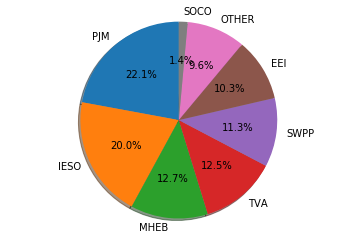

In [26]:
# Pie chart
sizes=table_sum_2['NSI']
labels=table_sum_2.index.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
# Filter on PJM interface
plot_df1=nsidata_new[nsidata_new['INTERFACE']=='PJM']
plot_df1.head()

,INTERFACE,MKTDAY,HE,NSI
6,PJM,2018-01-01,1,-1755.0
18,PJM,2018-01-02,1,-2460.0
30,PJM,2018-01-03,1,-1895.0
42,PJM,2018-01-04,1,-774.0
54,PJM,2018-01-05,1,-2252.0


Text(0.5,1,'NSI from PJM')

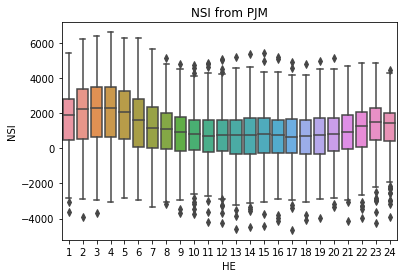

In [28]:
# Boxplot of NSI from PJM
sns.boxplot(x="HE", y="NSI", data=plot_df1).set_title("NSI from PJM")

C:\Users\Anupam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'NSI from PJM')

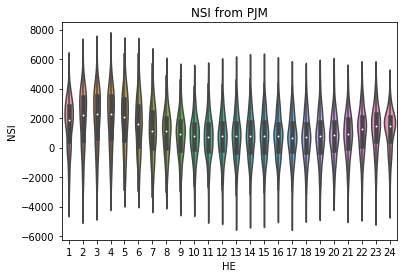

In [29]:
# Violinplot of NSI from PJM
sns.violinplot(x="HE", y="NSI", data=plot_df1).set_title("NSI from PJM")